# Project 2

In [29]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#import dataset
original_election_data = pd.read_csv("merged_train.csv")
#original_election_data.head()

In [3]:
#import dataset
test_data = pd.read_csv("demographics_test.csv")
#test_data.head()

In [4]:
demo_data = original_election_data[original_election_data['Party'] == 1]
repub_data = original_election_data[original_election_data['Party'] != 1]

### Task 1 : Partition dataset into training and validation sets 

In [5]:
#using Holdout method
demo_x_train, demo_x_val, demo_y_train, demo_y_val = train_test_split(demo_data.iloc[:,:-3], demo_data['Democratic'], test_size = 0.25, random_state=0)
repub_x_train, repub_x_val, repub_y_train, repub_y_val = train_test_split(repub_data.iloc[:,:-3], repub_data['Republican'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [23]:
x_train, x_val, y_train, y_val = train_test_split(original_election_data.iloc[:,:-3], original_election_data['Party'], test_size = 0.25, random_state=0)

### Task 2 : Standardizing training and validation sets

In [6]:
scaler = StandardScaler()
scaler.fit(demo_x_train.iloc[:,3:])
demo_x_train_scaled = scaler.transform(demo_x_train.iloc[:,3:])
demo_x_train_scaled = pd.DataFrame(demo_x_train_scaled)
demo_x_val_scaled = scaler.transform(demo_x_val.iloc[:,3:])
demo_x_val_scaled = pd.DataFrame(demo_x_val_scaled)
#demo_x_train_scaled

In [7]:
scaler = StandardScaler()
scaler.fit(repub_x_train.iloc[:,3:])
repub_x_train_scaled = scaler.transform(repub_x_train.iloc[:,3:])
repub_x_train_scaled = pd.DataFrame(repub_x_train_scaled)
repub_x_val_scaled = scaler.transform(repub_x_val.iloc[:,3:])
repub_x_val_scaled = pd.DataFrame(repub_x_val_scaled)

In [25]:
scaler.fit(x_train.iloc[:,3:])
x_train_scaled = scaler.transform(x_train.iloc[:,3:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,3:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [8]:
test_data_scaled = scaler.transform(test_data.iloc[:,3:])
test_data_scaled = pd.DataFrame(test_data_scaled)

In [50]:
#using K fold cross-validation method
folds = KFold(n_splits = 6, shuffle = False)

In [52]:
for train_index, test_index in folds.split(demo_data):
    print([train_index.shape[0], test_index.shape[0]])
for train_index, test_index in folds.split(repub_data):
    print([train_index.shape[0], test_index.shape[0]])

In [51]:
scaler = StandardScaler()
model = linear_model.LinearRegression()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
scores = cross_val_score(pipeline, X = demo_data.iloc[:,3:-3], y = demo_data['Democratic'], cv = folds)
print(scores)
print(scores.mean(),scores.std())

[0.73774437 0.93225943 0.90463086 0.86043711 0.79977053 0.85579754]
0.8484399717681818 0.0645541277628473


### Task 3 : Build Linear Regression Model

#### For Democratic Party

In [63]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[103624.81621321  -4266.71421325  -3820.7434915   -4479.42316769
  -5484.01243206    413.41199685 -11448.16943487  -4760.86121281
   -717.04138946   2886.76855164   5759.19791935 -24072.38083839
  -3283.54262932]
67233.13168724279


In [64]:
predicted = fitted_model.predict(demo_x_val_scaled)
print(predicted[:5])

[ 35534.52933747   -341.03510784 289390.53377784  41410.28474565
  30078.00063559]


In [65]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9559842733712434
0.9139059309331442
0.8989330493562997


In [66]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled, y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9062568819285339
0.8899537309595833


In [75]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43373.82177949648
154265650092.2809
1881288415.7595234
43373.82177949648


#### For Republic Party

In [14]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[20959.79427444  1073.48906332    26.5507054    519.20511435
   160.1325564   -219.55535432  -795.00206857  1142.94276452
  1519.76548773   409.04285069   625.62619945  -589.5266056
  -282.89398987]
12655.983128834358


In [15]:
predicted = fitted_model.predict(repub_x_val_scaled)
print(predicted[:5])

[10845.75805198 24983.35644565 35797.76474502  2213.69567533
  1113.58400542]


In [16]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.9827560742690562
0.9658095015127267
0.9638081064793254


In [17]:
R_squared_ = fitted_model.score(X = repub_x_val_scaled, y = repub_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.956582314849456
0.9540407918162535


In [18]:
rms = m.sqrt(mean_squared_error(repub_y_val, predicted))
print(rms)

5032.5002019522135


### Task 4 : Build Classification Model

#### k Nearest

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
y_pred = classifier.predict(x_val_scaled)

[[202  20]
 [ 39  38]]


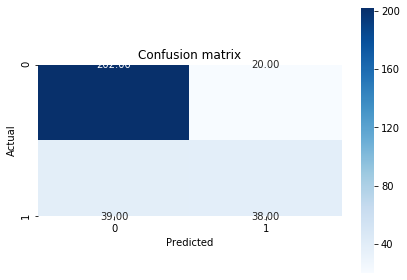

In [45]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [44]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.802675585284281, 0.19732441471571904, array([0.83817427, 0.65517241]), array([0.90990991, 0.49350649]), array([0.87257019, 0.56296296])]


#### Naive Bayes

In [46]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred = classifier.predict(x_val_scaled)

[[195  27]
 [ 34  43]]


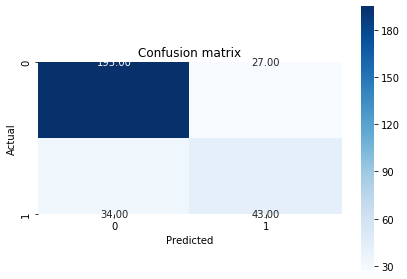

In [48]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [49]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7959866220735786, 0.20401337792642138, array([0.85152838, 0.61428571]), array([0.87837838, 0.55844156]), array([0.86474501, 0.58503401])]


#### SVM

In [52]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_pred = classifier.predict(x_val_scaled)

[[216   6]
 [ 37  40]]


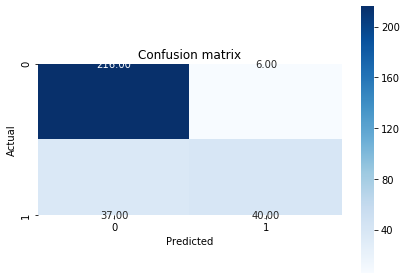

In [55]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [56]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


#### Decision Tree

In [57]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [58]:
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 100, 11, -0.08037002, 0.85103407, 896, 896.)
 (  2,   7, 12, -1.57463121, 0.99675236, 328, 328.)
 (  3,   4,  1,  0.13988956, 0.28290479,  61,  61.)
 ( -1,  -1, -2, -2.        , 0.        ,  57,  57.)
 (  5,   6, 11, -2.27329141, 0.81127812,   4,   4.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 (  8,  15,  0, -0.34515437, 0.98895258, 267, 267.)
 (  9,  10, 11, -0.18558561, 0.30337484,  37,  37.)
 ( -1,  -1, -2, -2.        , 0.        ,  29,  29.)
 ( 11,  12,  9, -0.91212842, 0.81127812,   8,   8.)
 ( -1,  -1, -2, -2.        , 0.        ,   5,   5.)
 ( 13,  14,  5,  0.40603571, 0.91829583,   3,   3.)
 ( -1,  -1, -2, -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( 16,  17,  1, -1.39712286, 1.        , 230, 230.)
 ( -1,  -1, -2, -2.        , 0.        ,  10,  10.)
 ( 18,  99, 10,  0.07734165, 0.9985091 , 220, 220.)
 ( 19,  42,  4, -0.37913467, 0.99998349, 209, 209.)
 ( 20,  25, 

197

In [59]:
y_pred = classifier.predict(x_val_scaled)

[[184  38]
 [ 34  43]]


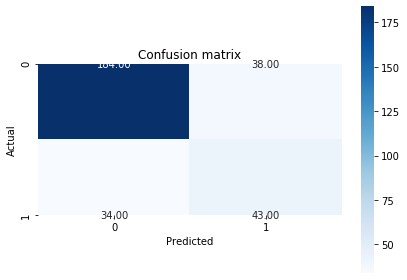

In [60]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [61]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7591973244147158, 0.24080267558528423, array([0.8440367, 0.5308642]), array([0.82882883, 0.55844156]), array([0.83636364, 0.5443038 ])]
